In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from traffic_net.infer import load_model, evaluate
from traffic_net.infer import bad_cases, confusion_matrix
from traffic_net.visualize import plot_confusion_matrix
from traffic_net.visualize import analysis_confusion
from traffic_net.visualize import plot_image_row
from traffic_net.visualize import random_pick
from traffic_net.visualize import predict_class
from traffic_net.visualize import read_and_resize
from traffic_net.visualize import get_names
from traffic_net.dataset import load_traffic_dataset

%matplotlib inline

# load model
dataset = load_traffic_dataset('./traffic_data/')
img_ph, logits, prob, sess = load_model('sermanet', './ckpts/sermanet/')

INFO:tensorflow:Restoring parameters from ./ckpts/sermanet/sermanet-190


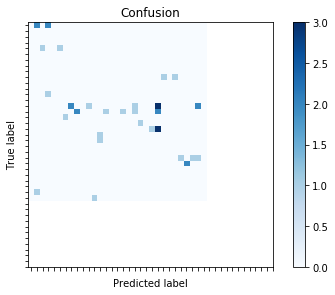

In [2]:
labels, ps, cases = bad_cases(dataset.valid)
images = dataset.valid['features'][cases]
pred = ps.argmax(axis=-1)
cm = confusion_matrix(labels, pred)
plot_confusion_matrix(cm)
plt.show()

In [3]:
error_rate = float(len(cases)) / len(dataset.valid['labels'])
print('num errors:%d/%d error_rate: %f' 
      % (len(cases), len(dataset.valid['labels']), error_rate))

num errors:40/4410 error_rate: 0.009070


In [4]:
print(analysis_confusion(cm))

Speed limit (20km/h): (Speed limit (30km/h), 2) (Speed limit (60km/h), 2) 
Speed limit (70km/h): (Speed limit (50km/h), 1) (Speed limit (80km/h), 1) 
No passing: (Slippery road, 1) (Road work, 1) 
Priority road: (Speed limit (60km/h), 1) 
Stop: (Bumpy road, 3) (Speed limit (100km/h), 2) (Bicycles crossing, 2) (No passing for vehicles over 3.5 metric tons, 1) (General caution, 1) 
No vehicles: (Speed limit (120km/h), 2) (Bumpy road, 2) (Yield, 1) (Vehicles over 3.5 metric tons prohibited, 1) (General caution, 1) 
Vehicles over 3.5 metric tons prohibited: (End of speed limit (80km/h), 1) 
No entry: (Dangerous curve to the left, 1) 
General caution: (Bumpy road, 3) (Double curve, 1) 
Dangerous curve to the left: (Priority road, 1) 
Dangerous curve to the right: (Priority road, 1) 
Slippery road: (Traffic signals, 1) (Children crossing, 1) (Bicycles crossing, 1) 
Road narrows on the right: (Pedestrians, 2) 
Bicycles crossing: (Speed limit (30km/h), 1) 
Beware of ice/snow: (Right-of-way at 

In [5]:
samples = random_pick(len(cases), 20)
idx = cases[samples]
images = dataset.valid['features'][idx]
labels = dataset.valid['labels'][idx]
pred = pred[samples]

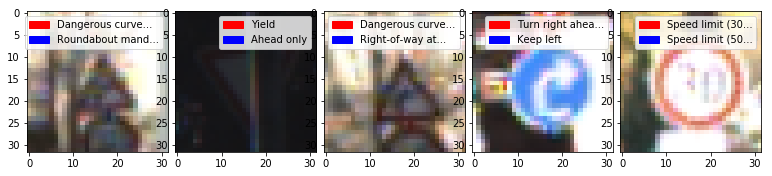

In [6]:
idx = range(5)
plot_image_row(images[idx], labels[idx], pred[idx])

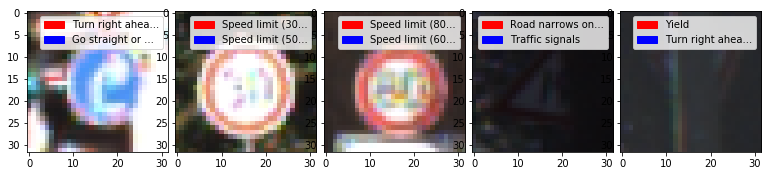

In [7]:
idx = range(5, 10)
plot_image_row(images[idx], labels[idx], pred[idx])

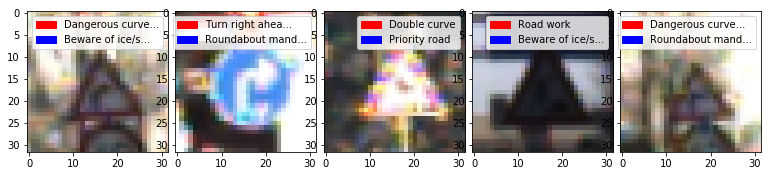

In [8]:
idx = range(10, 15)
plot_image_row(images[idx], labels[idx], pred[idx])

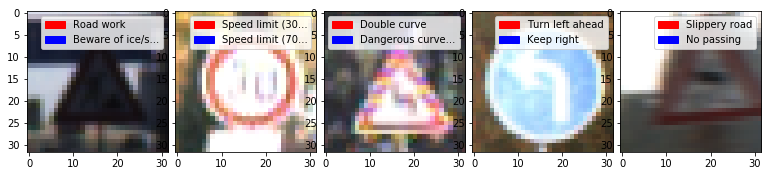

In [9]:
idx = range(15, 20)
plot_image_row(images[idx], labels[idx], pred[idx])

In [10]:
names = get_names()
for idx, nm in enumerate(names):
    print(idx, nm)

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


In [11]:
def evaluate_image(path, cls):
    image = read_and_resize(path)
    cls, score, target_score = predict_class(image, cls)
    plt.imshow(image)
    plt.show()
    print(cls, score, target_score)

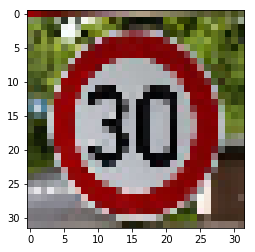

Speed limit (30km/h) 1.0 1.0


In [12]:
evaluate_image('./validate_imgs/30_limit.jpg', 'Speed limit (30km/h)')

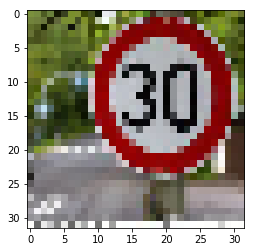

Priority road 0.380313 3.04608e-09


In [13]:
evaluate_image('./validate_imgs/30_limit_not_centered.jpg', 'Speed limit (30km/h)')

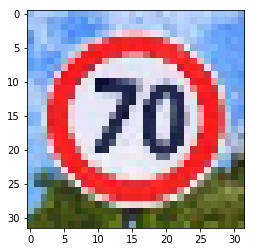

Speed limit (70km/h) 0.999776 0.999776


In [14]:
evaluate_image('./validate_imgs/70_limit.jpg', 'Speed limit (70km/h)')

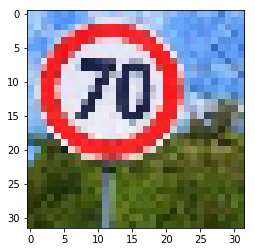

General caution 0.433685 0.000535779


In [15]:
evaluate_image('./validate_imgs/70_limit_not_centered.jpg', 'Speed limit (70km/h)')

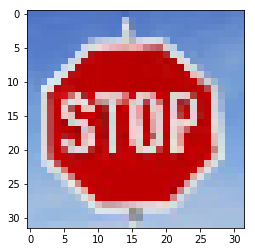

Stop 1.0 1.0


In [16]:
evaluate_image('./validate_imgs/stop.jpg', 'Stop')

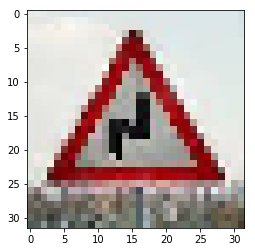

Children crossing 0.999997 2.9891e-23


In [17]:
evaluate_image('./validate_imgs/double_curve.jpg', 'Double curve')

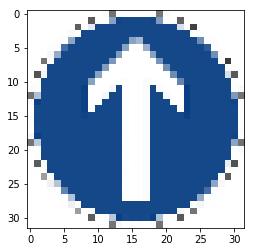

Ahead only 1.0 1.0


In [18]:
evaluate_image('./validate_imgs/ahead_only.png', 'Ahead only')

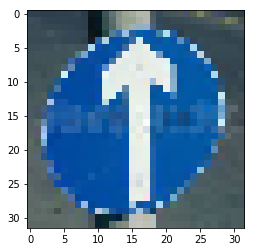

Ahead only 1.0 1.0


In [19]:
evaluate_image('./validate_imgs/ahead_only_2.jpg', 'Ahead only')

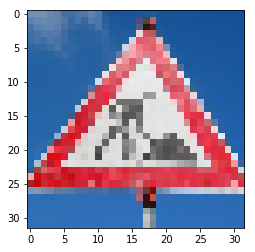

Road work 1.0 1.0


In [20]:
evaluate_image('./validate_imgs/road_work.jpg', 'Road work')

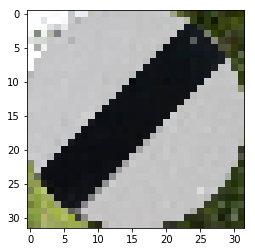

Go straight or right 0.656111 0.315067


In [21]:
evaluate_image('./validate_imgs/end_of_no_passing.jpg', 'End of no passing')